### Keras RNN으로 여행자 수 예측

1. 패키지 수입 및 파라미터 설정

In [1]:
# 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense
from keras.layers import LSTM, InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
# 파라미터
MY_PAST = 12
MY_SPLIT = 0.8
MY_HIDDEN = 300
MY_SHAPE = (MY_PAST, 1)
MY_EPOCH = 300

2. 데이터 처리

In [3]:
# 데이터 읽기
raw = pd.read_csv('/content/drive/MyDrive/data/airline.csv',
                  header=None,
                  usecols=[1])

# 데이터 샘플 출력
print(raw.head(15))
print(raw.describe())

      1
0   112
1   118
2   132
3   129
4   121
5   135
6   148
7   148
8   136
9   119
10  104
11  118
12  115
13  126
14  141
                1
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


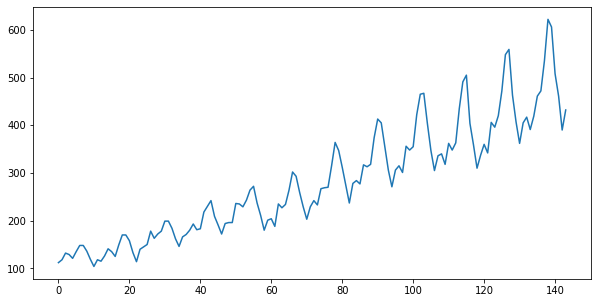

In [4]:
plt.figure(figsize=(10,5))
plt.plot(raw)

<class 'numpy.ndarray'>
[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 0.33397683 0.41119691 0.40

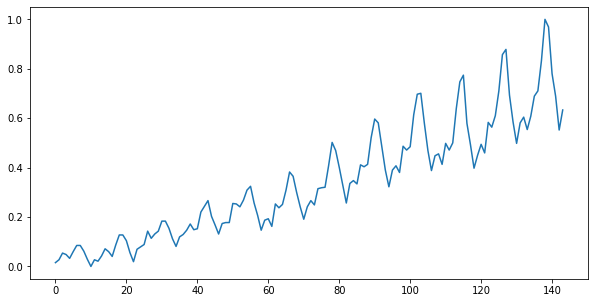

In [5]:
# 데이터 정규화
scaler = MinMaxScaler()
s_data = scaler.fit_transform(raw)

print(type(s_data))
print(s_data.flatten())
plt.figure(figsize=(10,5))
plt.plot(s_data)

In [6]:
# 데이터 분할
data = []
for i in range(len(s_data) - MY_PAST):
    data.append(s_data[i: i + MY_PAST + 1])

print('한 묶음의 크기:', len(data[0]))
print('총 묶음 수:', len(data))
print('첫번째 묶음 내용\n', data[0])

한 묶음의 크기: 13
총 묶음 수: 132
첫번째 묶음 내용
 [[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]]


In [7]:
# 데이터를 numpy로 전환
print(type(data))
data = np.array(data)
print(type(data))

# 묶음들을 섞음
#np.random.shuffle(data)
print(data.shape)
print(data)

# 데이터를 입력과 출력으로 분할
X_data = data[:, 0:MY_PAST]
Y_data = data[:,-1]

print('입력 데이터 모양', X_data.shape)
print('출력 데이터 모양', Y_data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(132, 13, 1)
[[[0.01544402]
  [0.02702703]
  [0.05405405]
  ...
  [0.        ]
  [0.02702703]
  [0.02123552]]

 [[0.02702703]
  [0.05405405]
  [0.04826255]
  ...
  [0.02702703]
  [0.02123552]
  [0.04247104]]

 [[0.05405405]
  [0.04826255]
  [0.03281853]
  ...
  [0.02123552]
  [0.04247104]
  [0.07142857]]

 ...

 [[0.58494208]
  [0.4980695 ]
  [0.58108108]
  ...
  [0.96911197]
  [0.77992278]
  [0.68918919]]

 [[0.4980695 ]
  [0.58108108]
  [0.6042471 ]
  ...
  [0.77992278]
  [0.68918919]
  [0.55212355]]

 [[0.58108108]
  [0.6042471 ]
  [0.55405405]
  ...
  [0.68918919]
  [0.55212355]
  [0.63320463]]]
입력 데이터 모양 (132, 12, 1)
출력 데이터 모양 (132, 1)


In [8]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size=MY_SPLIT,
                                                    shuffle=False)

# 최종 데이터 모양 출력
print('학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)

학습용 입력 데이터 모양: (105, 12, 1)
학습용 출력 데이터 모양: (105, 1)
평가용 입력 데이터 모양: (27, 12, 1)
평가용 출력 데이터 모양: (27, 1)


3. 인공신경망 구현

In [9]:
model = Sequential()

model.add(InputLayer(input_shape=MY_SHAPE))

model.add(LSTM(units=MY_HIDDEN))

model.add(Dense(units=1,
                activation='sigmoid'))

print('RNN 요약')
model.summary()

RNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               362400    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


4. 인공신경망 학습

In [10]:
# RNN 학습 설정
model.compile(optimizer='rmsprop',
              loss='mae')

print('학습 시작')
begin=time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          verbose=0)

end = time()

print('학습 시간: {:.2f}' .format(end-begin))

학습 시작
학습 시간: 8.10


5. 인공신경망 평가

In [11]:
# RNN 평가
score = model.evaluate(x=X_test,
               y=Y_test,
               verbose=0)

print('최종 손실값:', score)


최종 손실값: 0.05168144404888153


6. 인공신경망 예측

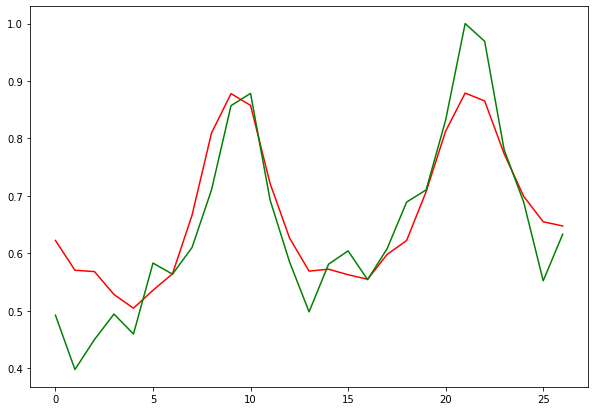

In [12]:
# RNN으로 예측
pred = model.predict(x=X_test)

# 예측 결과 및 정답 그래프 그리기
plt.figure(figsize=(10, 7))
plt.plot(pred, 'r')
plt.plot(Y_test, 'g')

In [13]:
print('역전환 전:', pred)
print(pred.shape)

# 데이터 역전환
pred = scaler.inverse_transform(pred)

print('역전환 후:', pred)
print(pred.shape)

# squeeze 결과
tmp = np.squeeze(pred).astype(int)
print('squeeze 후:', tmp)
print(tmp.shape)

역전환 전: [[0.622387  ]
 [0.570475  ]
 [0.5681676 ]
 [0.5282767 ]
 [0.50440484]
 [0.53568995]
 [0.5643539 ]
 [0.6661558 ]
 [0.8095382 ]
 [0.87806493]
 [0.8575669 ]
 [0.72171694]
 [0.6265686 ]
 [0.56898105]
 [0.57232165]
 [0.5627007 ]
 [0.55484295]
 [0.5980526 ]
 [0.6222992 ]
 [0.7074041 ]
 [0.81281275]
 [0.87900543]
 [0.8652768 ]
 [0.77319807]
 [0.69914776]
 [0.65491295]
 [0.64759403]]
(27, 1)
역전환 후: [[426.39648]
 [399.50604]
 [398.31085]
 [377.64734]
 [365.2817 ]
 [381.4874 ]
 [396.33533]
 [449.06873]
 [523.3408 ]
 [558.83765]
 [548.21967]
 [477.8494 ]
 [428.56256]
 [398.7322 ]
 [400.46262]
 [395.47897]
 [391.40866]
 [413.79126]
 [426.35098]
 [470.43533]
 [525.037  ]
 [559.32477]
 [552.2134 ]
 [504.5166 ]
 [466.15854]
 [443.24493]
 [439.45374]]
(27, 1)
squeeze 후: [426 399 398 377 365 381 396 449 523 558 548 477 428 398 400 395 391 413
 426 470 525 559 552 504 466 443 439]
(27,)


In [14]:
# 정답 출력
print('역전환 전 정답', Y_test)
Y_test = scaler.inverse_transform(Y_test)
print('역전환 후 정답', Y_test)

역전환 전 정답 [[0.49227799]
 [0.3976834 ]
 [0.44980695]
 [0.49420849]
 [0.45945946]
 [0.58301158]
 [0.56370656]
 [0.61003861]
 [0.71042471]
 [0.85714286]
 [0.87837838]
 [0.69305019]
 [0.58494208]
 [0.4980695 ]
 [0.58108108]
 [0.6042471 ]
 [0.55405405]
 [0.60810811]
 [0.68918919]
 [0.71042471]
 [0.83204633]
 [1.        ]
 [0.96911197]
 [0.77992278]
 [0.68918919]
 [0.55212355]
 [0.63320463]]
역전환 후 정답 [[359.]
 [310.]
 [337.]
 [360.]
 [342.]
 [406.]
 [396.]
 [420.]
 [472.]
 [548.]
 [559.]
 [463.]
 [407.]
 [362.]
 [405.]
 [417.]
 [391.]
 [419.]
 [461.]
 [472.]
 [535.]
 [622.]
 [606.]
 [508.]
 [461.]
 [390.]
 [432.]]
